### 목표 설정
- 네이버 영화 리뷰 데이터셋을 이용해서 긍정/부정을 판별하는 분류기를 만들어보자.
- TF-IDF방법을 이용해서 토큰화를 진행해보자
- Konlpy 한국어 형태소 분석기 이용해보자
- 단어별 긍/부정 정보를 시각화해서 알아보자

In [90]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum # 폰트설치
!sudo fc-cache -fv # 폰트 캐시 갱신
!rm ~/.cache/matplotlib -rf # 폰트 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [91]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글이 지원되는 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 지원

In [3]:
# 내 컴퓨터가 구글의 어느곳에 연결되서 위치하는지 확인
# 내 현재 작업의 위치 확인
!pwd

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 소스코드가 있는 경로로 위치를 변경
%cd /content/drive/MyDrive/Colab Notebooks/est

/content/drive/MyDrive/Colab Notebooks/est


In [6]:
!pwd

/content/drive/MyDrive/Colab Notebooks/est


In [7]:
# 필요한 라이브러리 불러오기
import pandas as pd

In [8]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/est/data/ratings_train.csv', encoding='utf-8')
test = pd.read_csv('data/ratings_test.csv', encoding='utf-8')
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [9]:
test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [12]:
# 결측치가 존재
# 확인
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [13]:
test[test['document'].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [14]:
# .dropna() : 결측치가 있는 행을 삭제
train.dropna(inplace=True)
test.dropna(inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


#### train / test / 문제 / 정답
- 어떤 컬럼이 문제데이터가 되고, 어떤 컬럼이 정답데이터가 되어야 할까?

In [17]:
train
# 0 부정
# 1 긍정

# 평점 8점 이상 -> 1 (긍정)
# 평점 4점 이하 -> 0 (부정)

# 5~7점은 제외

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [18]:
# 학습데이터의 정답데이터
train['label']

,label
0,0
1,1
2,0
3,0
4,1
...,...
149995,0
149996,1
149997,0
149998,1


In [19]:
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [20]:
# train / test셋에서 X_train, y_train, X_test, y_test로 분류하기

X_train = train['document']
y_train = train['label']

X_test = test['document']
y_test = test['label']

In [21]:
X_train

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...
149995,인간이 문제지.. 소는 뭔죄인가..
149996,평점이 너무 낮아서...
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((149995,), (149995,), (49997,), (49997,))

### 토큰화 시작
vectorizer
- vectorizer는 말 그대로 벡터화 시켜주는 도구
- 벡터화 : 텍스트나 이미지처럼 '비수치적'인 데이터를 '숫자 배열(백터)'로 바꾸는 과정
- 기계 학습 분야에서 주로 텍스트 데이터를 쉽게 분석하기 위해서 벡터화
- 숫자 / 벡터로 입력받기를 기대하는 머신러닝/딥러닝 모델을 실행하기 위해서는 텍스트나 또 다른 형태의 데이터를 벡터화/수치화 할 필요가 있다. 이때 사용하는 도구 vectorizer이다

#### BOW(Bag of Word) 단어가방
- 문서를 벡터로 변환하는 가장 기본적인 방법
- 문서내에 모든 단어를 모아서 가방을 만들고 특정 문서에 어떤 단어가 들어있는지 리스트/딕셔너리 형태로 순서-숫자로 나타내는 방법

In [23]:
# TF-IDF 기법 사용해보기
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
X_train[0:3]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다


In [25]:
# TF-IDF 벡터라이저 사용

# 객체 생성
tfidf = TfidfVectorizer()

# 단어 사전 구축
tfidf.fit(X_train[0:3])

TfidfVectorizer()

In [26]:
# 분리된 단어로 만든 단어사전 출력
tfidf.vocabulary_

# 띄어쓰기 기준

{'더빙': 2,
 '진짜': 6,
 '짜증나네요': 7,
 '목소리': 3,
 '포스터보고': 9,
 '초딩영화줄': 8,
 '오버연기조차': 5,
 '가볍지': 0,
 '않구나': 4,
 '너무재밓었다그래서보는것을추천한다': 1}

In [27]:
train[0:3]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [28]:
temp = TfidfVectorizer()

sugar = '설탕국수를냠냠쩝쩝맛있게 먹었다.'

# 단어사전 구축
temp.fit([sugar])

temp.vocabulary_

{'설탕국수를냠냠쩝쩝맛있게': 1, '먹었다': 0}

- TF-IDF Vectorizer는 기본적으로 어절 단위(문장을 이루는 토막)으로 끊어주기 때문에 한국어 특성상 파악이 어렵다.
- 더 작은 단위인 형태소 별로 나눠서 파악해야 한다.

### 한국어 형태소 분석기 사용해보기
- 한국어 특성에 맞춰 개발된 분석기를 사용해보자

In [29]:
# 라이브러리 설치
!pip install konlpy

In [30]:
# 형태소 분석기 불러오기
from konlpy.tag import Kkma

### Kkma(꼬꼬마)
- 서울대학교 IDS 연구실 개발

In [31]:
# 꼬꼬마 객체 생성
kkma = Kkma()

Kkma에서 사용되는 대표적인 함수
- nouns() : 명사 추출
- morphs() : 형태소를 추출
- pos() : 형태소 추출 + 품사 태그

In [32]:
sugar = '설탕국수를냠냠쩝쩝맛있게 먹었다.'

In [33]:
sugar

'설탕국수를냠냠쩝쩝맛있게 먹었다.'

In [34]:
kkma.nouns(sugar)

['설탕', '국수']

In [36]:
# tfidf + kkma 명사 추출기 연결해서 사용해보기
# TF-IDF Vectorizer에 연결하기 위해서 명사 추출기 함수로 만들어보자
def myTokenizer(text):
  return kkma.nouns(text)

In [37]:
X_train[0:3]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다


In [38]:
tfidf_nouns = TfidfVectorizer(tokenizer=myTokenizer)

# 적용
tfidf_nouns.fit(X_train[0:3])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function myTokenizer at 0x7ed57cb9de40>)

In [39]:
# 단어사전 확인
tfidf_nouns.vocabulary_

{'더빙': 0,
 '목소리': 2,
 '흠': 17,
 '포스터': 15,
 '포스터보고': 16,
 '보고': 4,
 '초': 12,
 '초딩영화줄': 13,
 '딩': 1,
 '영화': 6,
 '줄': 11,
 '오버': 7,
 '오버연기': 8,
 '연기': 5,
 '재': 9,
 '재밓': 10,
 '밓': 3,
 '추천': 14}

In [40]:
X_train[0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [41]:
# 형태소 추출 함수 morphs()
kkma.morphs(X_train[0])

['아', '아', '더빙', '..', '진짜', '짜증나', '네요', '목소리']

In [42]:
# 품사태그 종류 출력해보기
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [43]:
# 우리가 지금 진행하고 있는 분석은 감성 분류 분석(긍정 / 부정)
# 감성분석에서는 동사 / 형용사 / 보통명사를 많이 사용한다.
# 동사/형용사/보통명사만 따로 가져오자

### pos 태깅 활용방법 알아보기
- 형태소의 품사를 자동으로 식별

In [44]:
# 더미데이터
data = '프랑스월드컵 콩국수 먹는다 먹다 먹었다 맛없다 이상하다 안에 설탕'

In [45]:
kkma.pos(data)

[('프랑스', 'NNG'),
 ('월드컵', 'NNG'),
 ('콩국수', 'NNG'),
 ('먹', 'VV'),
 ('는', 'EPT'),
 ('다', 'ECS'),
 ('먹', 'VV'),
 ('다', 'ECS'),
 ('먹', 'VV'),
 ('었', 'EPT'),
 ('다', 'ECS'),
 ('맛없', 'VA'),
 ('다', 'ECS'),
 ('이상', 'NNG'),
 ('하다', 'NNP'),
 ('안', 'NNG'),
 ('에', 'JKM'),
 ('설탕', 'NNG')]

In [46]:
# 데이터프레임으로 만들어보자
df = pd.DataFrame(kkma.pos(data), columns=['morph', 'tag'])

# 인덱스를 tag로 지정해보자
df.set_index('tag', inplace = True)
df

,morph
tag,
NNG,프랑스
NNG,월드컵
NNG,콩국수
VV,먹
EPT,는
ECS,다
VV,먹
ECS,다
VV,먹


In [47]:
# 문장데이터에 우리가 만들어준 토크나이저 적용해보자
# 적용 준비 단계 - 함수화

def myTokenizer2(text):

  # 우리가 사용할 품사만 뽑아오자
  d = pd.DataFrame(kkma.pos(text), columns=['morph', 'tag'])

  # 인덱스를 태그로 지정해보자
  d.set_index('tag', inplace=True)

  # 동사 / 형용사 / 보통명사만 뽑아서 데이터 프레임 만들어보자
  # if ('VV' in d.index) | ('VA in d.index') | ('NNG' in d.index):
  if d.index.isin(['VV', 'VA', 'NNG']).any(): # 인덱스에 VV, VA, NNG 이중 하나라도 포함한다면~
    return d.loc[d.index.isin(['VV', 'VA', 'NNG']), 'morph'].values # 인덱스가 VV or VA or NNG인 값
  else:
    return []

In [48]:
kkma.tagset['VV']

'동사'

In [49]:
# TF-IDF Vectorizer에 연결
tfidf_pos = TfidfVectorizer(tokenizer=myTokenizer2)

# 적용
tfidf_pos.fit(X_train[0:3])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x7ed57cb9e3e0>)

In [50]:
# 단어사전 확인
tfidf_pos.vocabulary_

{'아': 5,
 '더빙': 1,
 '짜증나': 12,
 '목소리': 2,
 '흠': 15,
 '포스터': 14,
 '보고': 4,
 '영화': 8,
 '줄': 11,
 '오버': 9,
 '연기': 7,
 '가볍': 0,
 '재': 10,
 '어': 6,
 '보': 3,
 '추천': 13}

In [51]:
X_train

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...
149995,인간이 문제지.. 소는 뭔죄인가..
149996,평점이 너무 낮아서...
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


In [54]:
# 실제 데이터를 이용해서 단어사전 구축해보자
tfidf_final = TfidfVectorizer(tokenizer=myTokenizer2)

# 10000개의 데이터를 이용해서 단어사전 구축
tfidf_final.fit(X_train[0:1000])

TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x7ed57cb9e3e0>)

In [55]:
# 구축한 단어사전 확인해보기
tfidf_final.vocabulary_

{'아': 1369,
 '더빙': 511,
 '짜증나': 2100,
 '목소리': 780,
 '흠': 2510,
 '포스터': 2336,
 '보고': 941,
 '영화': 1564,
 '줄': 2025,
 '오버': 1596,
 '연기': 1529,
 '가볍': 16,
 '재': 1868,
 '어': 1449,
 '보': 940,
 '추천': 2174,
 '교도소': 191,
 '이야기': 1753,
 '멀': 746,
 '재미': 1871,
 '없': 1485,
 '점': 1917,
 '조정': 1979,
 '익살': 1771,
 '돋보이': 538,
 '스파이': 1276,
 '더': 507,
 '맨': 736,
 '늙': 431,
 '보이': 950,
 '하': 2379,
 '커스틴': 2203,
 '이쁘': 1746,
 '걸음마': 104,
 '떼': 613,
 '초등학교': 2154,
 '학년': 2392,
 '생인': 1138,
 '용': 1645,
 '별': 937,
 '반개': 880,
 '아깝': 1371,
 '원작': 1677,
 '긴장감': 288,
 '살리': 1091,
 '욕': 1640,
 '나오': 337,
 '이응': 1757,
 '경': 122,
 '길': 290,
 '우': 1650,
 '생활': 1139,
 '발': 889,
 '낫': 364,
 '납': 362,
 '감금': 42,
 '반복': 884,
 '이': 1728,
 '드라마': 573,
 '가족': 28,
 '사람': 1064,
 '모': 766,
 '엿': 1549,
 '액션': 1437,
 '있': 1815,
 '안': 1402,
 '평점': 2328,
 '낮': 367,
 '헐': 2437,
 '우드': 1651,
 '식': 1309,
 '화려': 2476,
 '길들이': 291,
 '인피': 1784,
 '니트': 439,
 '짱': 2106,
 '때': 602,
 '눈물': 420,
 '나': 327,
 '죽': 2020,
 '향수': 2431,
 '자극'

In [56]:
# .transform : 텍스트데이터 벡터화
# 실제 문장을 잘게 쪼개서 수치값으로 바꿔주자
X_train_text = tfidf_final.transform(X_train[0:1000])
X_test_text = tfidf_final.transform(X_test[0:1000])

In [57]:
X_train_text
# 10000개의 데이터
# 8748가지의 단어
# 총 단어 수 72671개

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7334 stored elements and shape (1000, 2527)>

In [58]:
X_test_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5569 stored elements and shape (1000, 2527)>

- 머신러닝 모델을 이용해서 텍스트 분석을 진행

In [59]:
# Logistic 회귀 모형 import
from sklearn.linear_model import LogisticRegression

In [60]:
# 로지스틱 회귀 객체 생성
logi = LogisticRegression()

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((149995,), (149995,), (49997,), (49997,))

In [62]:
X_train_text.shape, X_test_text.shape

((1000, 2527), (1000, 2527))

In [63]:
# 로지스틱 회귀모형 학습
logi.fit(X_train_text, y_train[0:1000])

LogisticRegression()

In [66]:
# train 데이터서의 정확도 확인
logi.score(X_train_text, y_train[0:1000])

0.93

In [67]:
# 학습하지 않은 데이터
# test 데이터서의 정확도 확인
logi.score(X_test_text, y_test[0:1000])

0.725

In [71]:
# logi 활용
# 정답의 구조 : 0(부정), 1(긍정)

review = [input('리뷰 입력 : ')]
target_names = ['부정', '긍정'] # 0번인덱스로 접근하면 '부정, 1번인덱스로 접근하면 '긍정'

# 토큰화 변환 진행(모델은 숫자벡터만 이해하기 때문)
vect_review = tfidf_final.transform(review)

# predict_proba
# 클래스에 대한 확률 반환  ex) [0.28, 0.72]      [0.96, 0.04]
pro = logi.predict_proba(vect_review)
# max() 에 넣어서 더 큰값을 받아오면 -> 신뢰도

# predict
# 하나의 정답(0 또는 1)로 반환
pre = logi.predict(vect_review) # 부정적인 리뷰 -> 0,  긍정적인 리뷰 -> 1

print(f'{review[0]} 문장은 {pro.max()*100:.2f}%로 {target_names[pre[0]]} 리뷰입니다.')




리뷰 입력 : 최고의 쓰레기
최고의 쓰레기 문장은 53.16%로 긍정 리뷰입니다.


In [72]:
# 단어사전 확인
tfidf_final.vocabulary_

{'아': 1369,
 '더빙': 511,
 '짜증나': 2100,
 '목소리': 780,
 '흠': 2510,
 '포스터': 2336,
 '보고': 941,
 '영화': 1564,
 '줄': 2025,
 '오버': 1596,
 '연기': 1529,
 '가볍': 16,
 '재': 1868,
 '어': 1449,
 '보': 940,
 '추천': 2174,
 '교도소': 191,
 '이야기': 1753,
 '멀': 746,
 '재미': 1871,
 '없': 1485,
 '점': 1917,
 '조정': 1979,
 '익살': 1771,
 '돋보이': 538,
 '스파이': 1276,
 '더': 507,
 '맨': 736,
 '늙': 431,
 '보이': 950,
 '하': 2379,
 '커스틴': 2203,
 '이쁘': 1746,
 '걸음마': 104,
 '떼': 613,
 '초등학교': 2154,
 '학년': 2392,
 '생인': 1138,
 '용': 1645,
 '별': 937,
 '반개': 880,
 '아깝': 1371,
 '원작': 1677,
 '긴장감': 288,
 '살리': 1091,
 '욕': 1640,
 '나오': 337,
 '이응': 1757,
 '경': 122,
 '길': 290,
 '우': 1650,
 '생활': 1139,
 '발': 889,
 '낫': 364,
 '납': 362,
 '감금': 42,
 '반복': 884,
 '이': 1728,
 '드라마': 573,
 '가족': 28,
 '사람': 1064,
 '모': 766,
 '엿': 1549,
 '액션': 1437,
 '있': 1815,
 '안': 1402,
 '평점': 2328,
 '낮': 367,
 '헐': 2437,
 '우드': 1651,
 '식': 1309,
 '화려': 2476,
 '길들이': 291,
 '인피': 1784,
 '니트': 439,
 '짱': 2106,
 '때': 602,
 '눈물': 420,
 '나': 327,
 '죽': 2020,
 '향수': 2431,
 '자극'

In [75]:
voc = pd.DataFrame(tfidf_final.vocabulary_.keys(), # 단어사전의 key값
                   index = tfidf_final.vocabulary_.values(), # 단어사전의 value값을 인덱스
                   columns = ['word'] # 컬럼명
                   )
voc.sort_index()

,word
0,ㄱ
1,ㄷ
2,ㅅ
3,ㅇ
4,ㅈ
...,...
2522,히
2523,히어로
2524,힘
2525,힘겹


In [77]:
# 가중치 확인
logi.coef_.T

array([[ 0.24184471],
       [-0.1546196 ],
       [ 0.18211495],
       ...,
       [ 0.09692447],
       [ 0.20176133],
       [ 0.03592291]])

In [81]:
# DF의 형태로 가중치 확인
learning_result = pd.DataFrame(logi.coef_.T,
                               index = voc.sort_index()['word'],
                               columns = ['weight'])

learning_result.sort_values('weight', inplace=True)
learning_result

,weight
word,
없,-2.064534
재미없,-1.846122
쓰레기,-1.484891
아깝,-1.473153
내용,-1.384923
...,...
괜찮,1.515390
있,1.720937
재미있,1.859164


,word
0,ㄱ
1,ㄷ
2,ㅅ
3,ㅇ
4,ㅈ
...,...
2522,히
2523,히어로
2524,힘
2525,힘겹


In [83]:
# 부정(0)에 영향을 많이 끼친 상위 20단어
bad = learning_result.head(20)

In [85]:
# 긍정(1)에 영향을 많이 끼친 상위 20단어
good = learning_result.tail(20)

In [86]:
# bad, good 병합
top20 = pd.concat([bad, good])
top20

,weight
word,
없,-2.064534
재미없,-1.846122
쓰레기,-1.484891
아깝,-1.473153
내용,-1.384923
돈,-1.177390
하,-1.167862
실망,-1.109404
최악,-0.995259


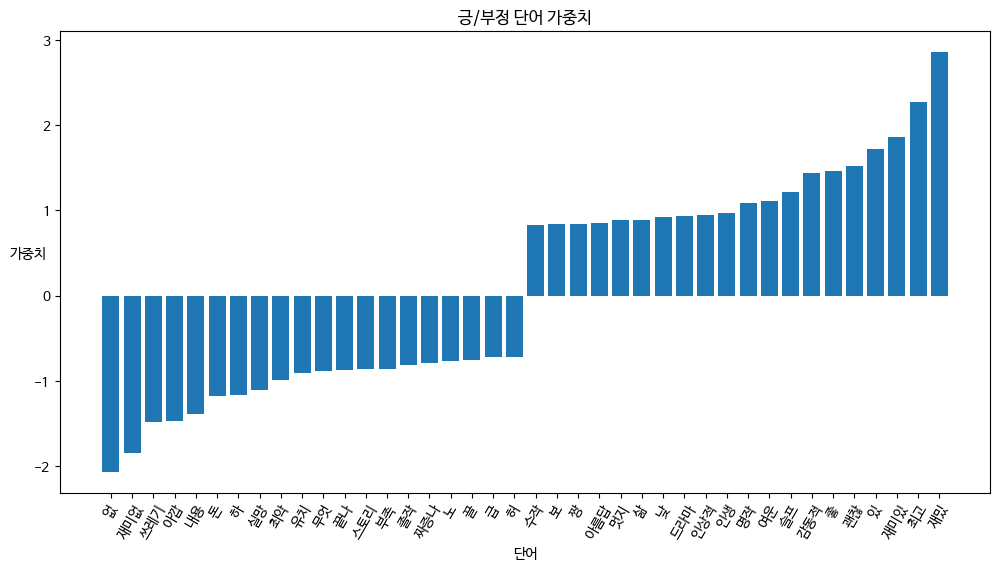

In [89]:
plt.figure(figsize = (12,6))
plt.title('긍/부정 단어 가중치')
plt.xlabel('단어')
plt.ylabel('가중치', rotation=0)
plt.bar(top20.index, top20['weight'])
plt.xticks(rotation = 60)
plt.show()